In [1]:
%cd ~/lab/metamodel-guidance-with-python/
from mmgpy.sampling import random_uniform
from mmgpy.sampling import halton
from mmgpy.sampling import uniform_grid

from mmgpy.sampling import cvt
from mmgpy.sampling import full_factorial
from mmgpy.sampling import multivariate_normal
from mmgpy.sampling import InterpolatedMarginalInverseECDF

from mmgpy.plotting import plot_2d_scatter
from mmgpy.benchmark import Rastrigin,TestFunctionSet2DInputSpace

/home/ggarrett/lab/metamodel-guidance-with-python


In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc, cm
import numpy as np
from scipy.spatial import Delaunay

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


def plot2Dscatter(x, y, name=None, demo_lim=True):
    fig = plt.figure(figsize=(4, 4), dpi=300)
    ax = fig.add_subplot(111)
    plt.gcf().patch.set_facecolor('0.95')
    if demo_lim:
        plt.gca().set_aspect('equal')
        plt.ylim((-0.05, 1.05))
        plt.xlim((-0.05, 1.05))
#     plt.grid(which='major', linewidth=0.5)
    plt.minorticks_on()
#     plt.grid(which='minor', linewidth=0.1)
    # plt.axis('off')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    plt.scatter(x, y, s=4)
    if name is not None:
        plt.savefig(name)
    plt.show()
    
def plot2Dline(x, y, name=None, demo_lim=True):
    fig = plt.figure(figsize=(4, 4), dpi=300)
    ax = fig.add_subplot(111)
    plt.gcf().patch.set_facecolor('0.95')
    if demo_lim:
        plt.gca().set_aspect('equal')
        plt.ylim((-0.05, 1.05))
        plt.xlim((-0.05, 1.05))
#     plt.grid(which='major', linewidth=0.5)
    plt.minorticks_on()
#     plt.grid(which='minor', linewidth=0.1)
    # plt.axis('off')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    plt.plot(x, y)
    if name is not None:
        plt.savefig(name)
    plt.show()

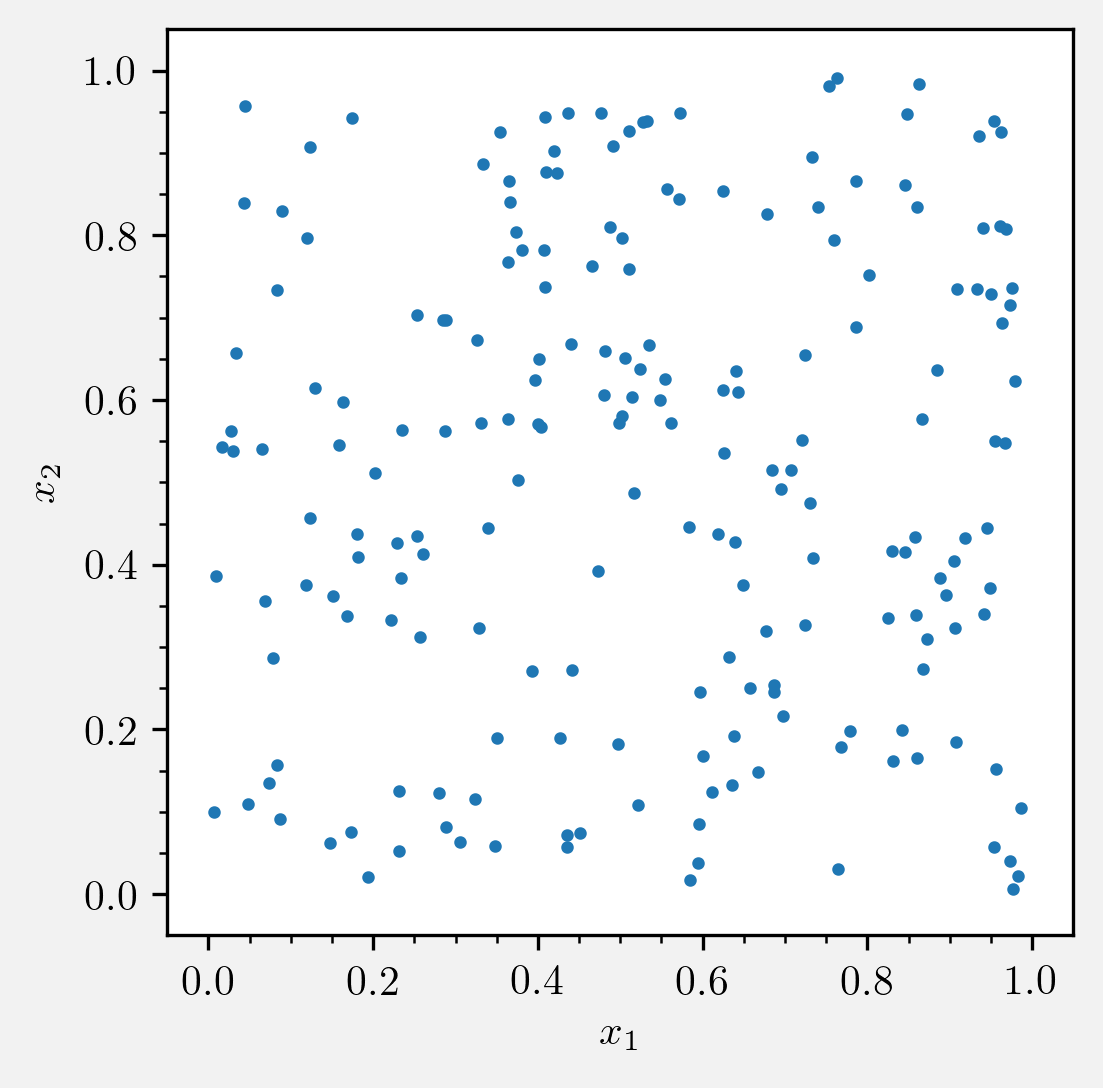

In [5]:
test = random_uniform(2, 200, seed=4)
plot2Dscatter(*test.T, name='mmgpy/_plots/random_sampling.pdf')

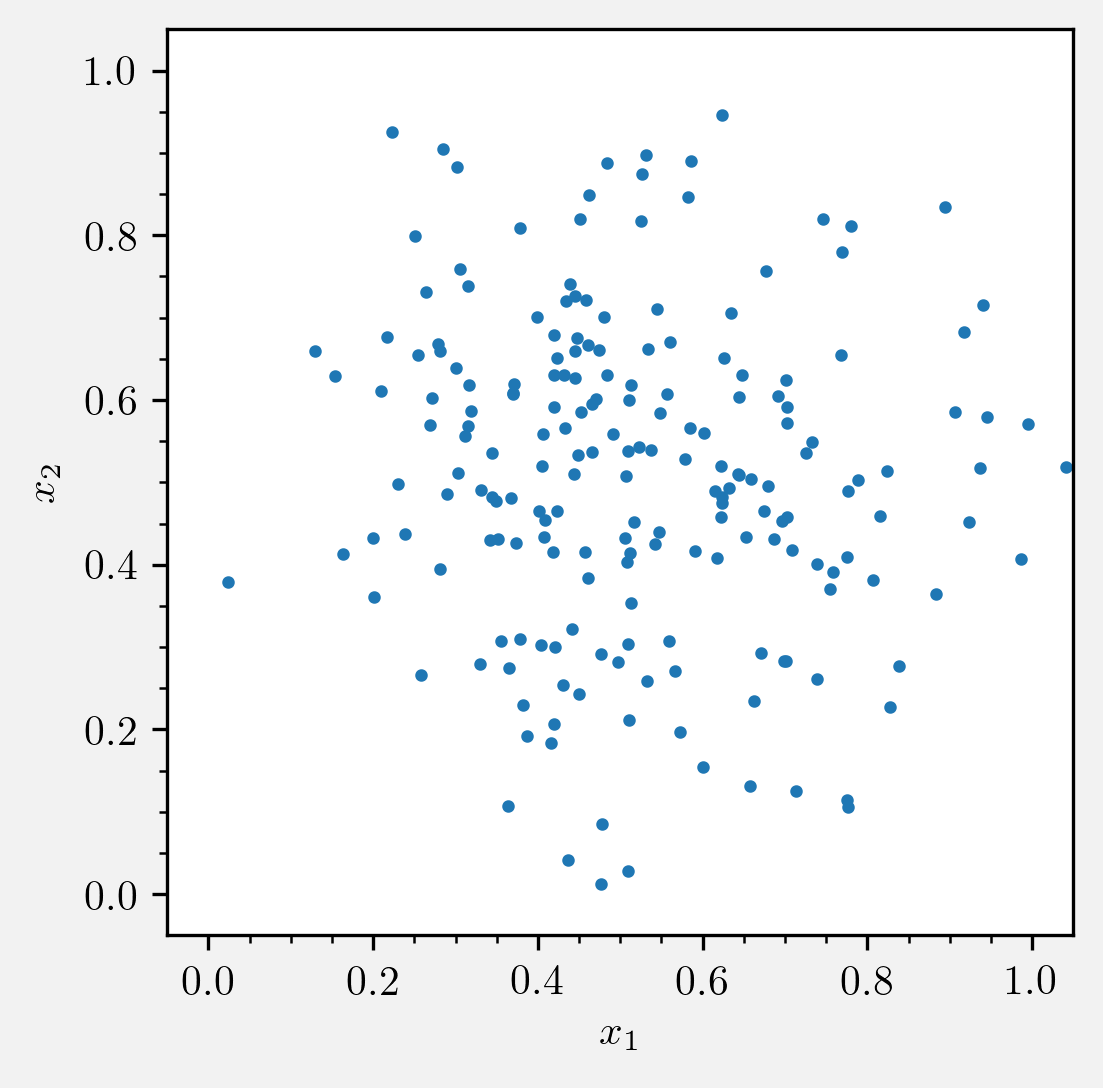

In [13]:
test = multivariate_normal([0.5,0.5],[[0.04, 0],[0, 0.04]], 200, seed=4)
plot2Dscatter(*test.T, name='mmgpy/_plots/multivariate_normal.pdf')

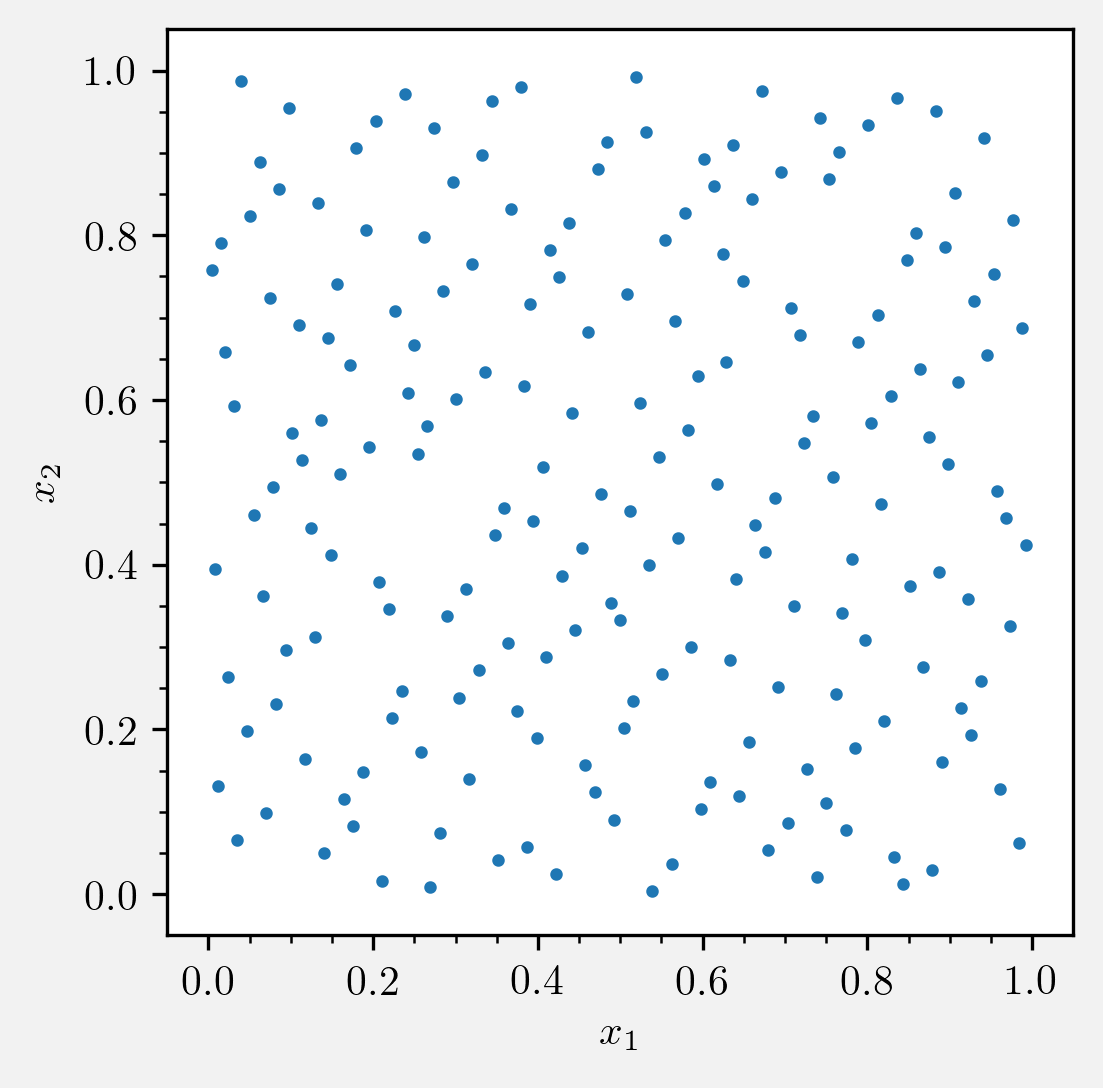

In [14]:
test = halton(2, 200, seed=4)
plot2Dscatter(*test.T, name='mmgpy/_plots/halton_sequences.pdf')

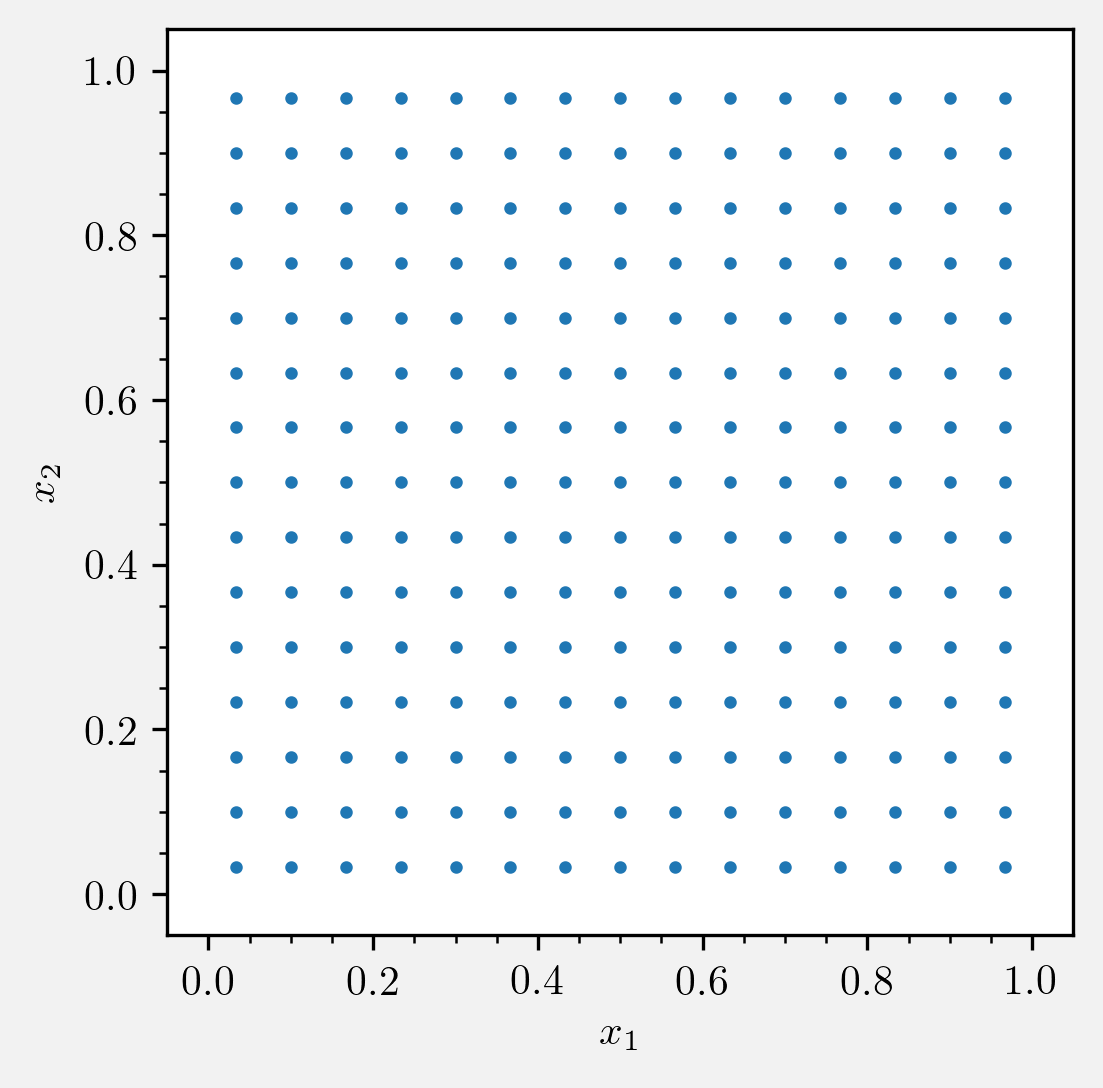

In [15]:
test = uniform_grid(2, 15, seed=4)
plot2Dscatter(*test.T, name='mmgpy/_plots/uniform_grid.pdf')

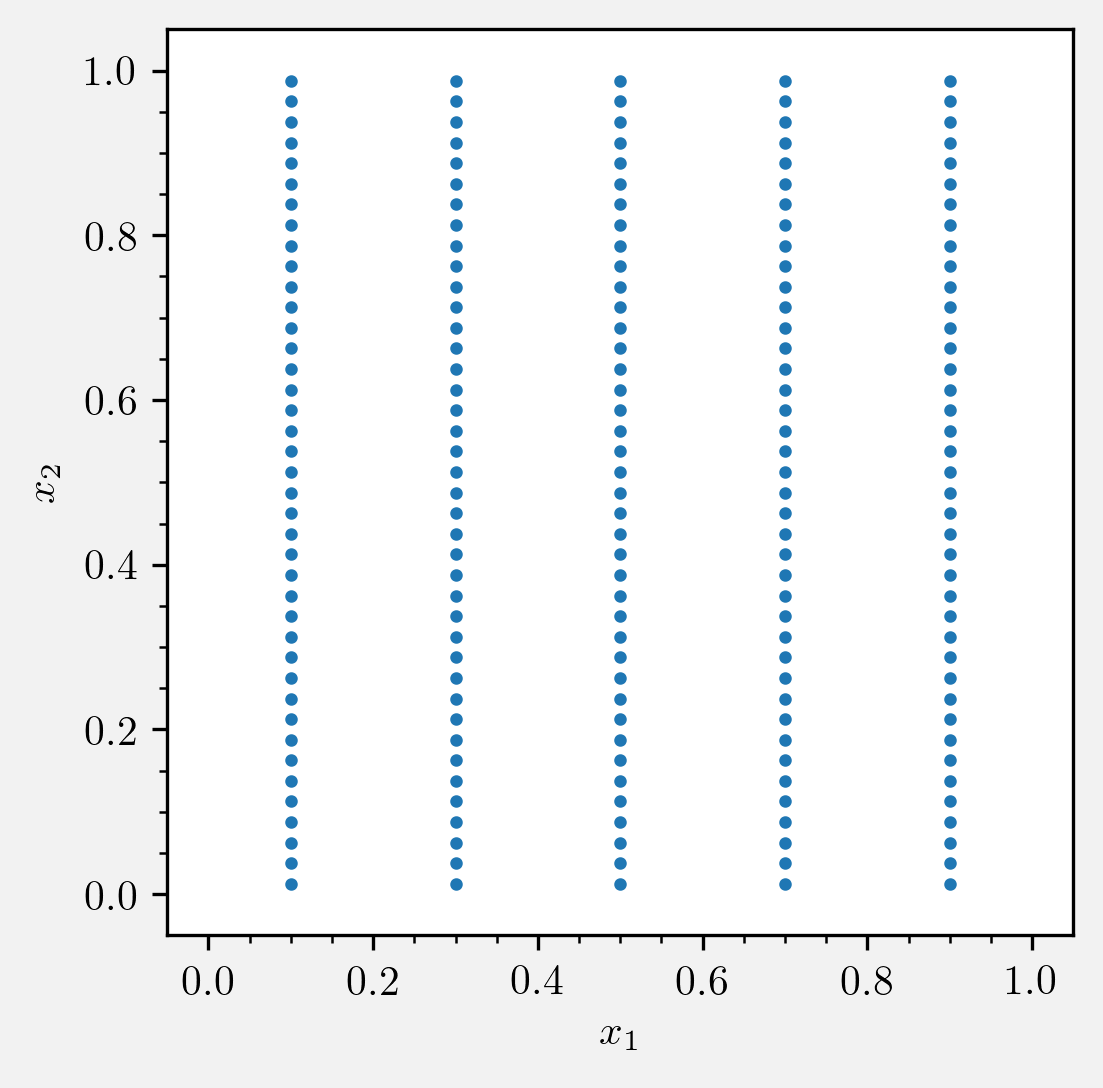

In [32]:
test = full_factorial(2, (5, 40), edges=False)
plot2Dscatter(*test.T, name='mmgpy/_plots/full_factorial.pdf')

In [33]:
test_cvt = cvt(2, 200, sample_num=int(1e4), iterations=30)

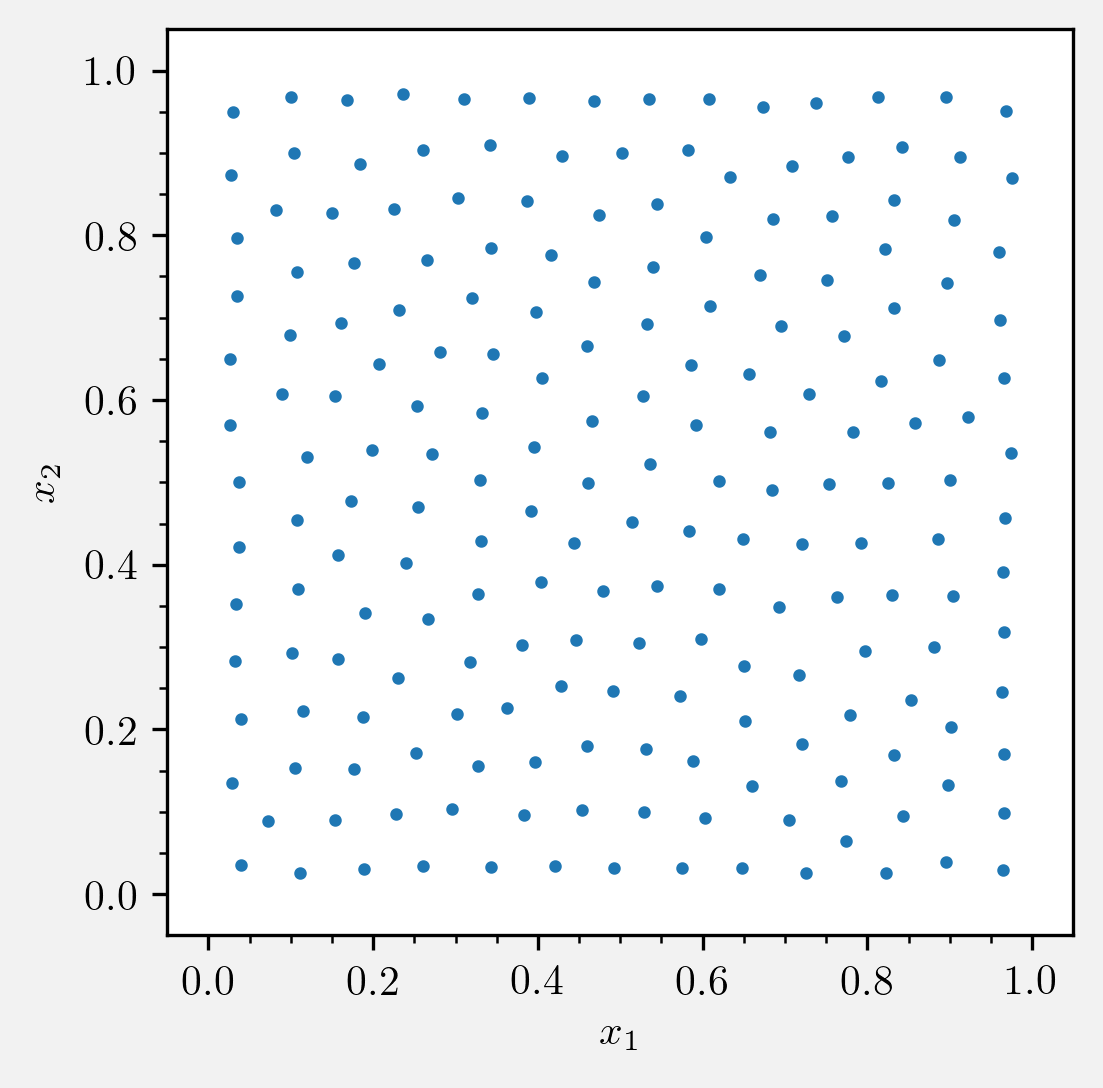

In [18]:
plot2Dscatter(*test_cvt.T, name='mmgpy/_plots/cvt.pdf')

In [5]:
# test = uniform_grid(2, 200)
test = halton(2, 20000)
print(test.shape)
#test=test_cvt
func = TestFunctionSet2DInputSpace().Rastrigin2D
func._bounds=0.3 * func._bounds

feval = func(*test.T)
feval = feval - np.min(feval)
ecdf1 = InterpolatedMarginalInverseECDF(feval**1, test, kind='linear')
ecdf2 = InterpolatedMarginalInverseECDF(feval**2, test, kind='linear')
ecdf3 = InterpolatedMarginalInverseECDF(feval**3, test, kind='linear')
ecdf4 = InterpolatedMarginalInverseECDF(feval**4, test, kind='linear')
ecdf5 = InterpolatedMarginalInverseECDF(feval**5, test, kind='linear')
ecdf6 = InterpolatedMarginalInverseECDF(feval**6, test, kind='linear')
ecdf7 = InterpolatedMarginalInverseECDF(feval**7, test, kind='linear')
ecdf8 = InterpolatedMarginalInverseECDF(feval**8, test, kind='linear')
ecdf9 = InterpolatedMarginalInverseECDF(feval**9, test, kind='linear')
ecdf10 = InterpolatedMarginalInverseECDF(feval**10, test, kind='linear')
ecdf11 = InterpolatedMarginalInverseECDF(feval**11, test, kind='linear')
ecdf = [
    ecdf1, ecdf2, ecdf3, ecdf4, ecdf5, ecdf6, ecdf7, ecdf8, ecdf9, ecdf10, ecdf11
]

#F = marginal_inverse_ecdf(func(*test.T), test, kind='linear')

test.shape
# ecdf(test).shape

(20000, 2)


(20000, 2)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


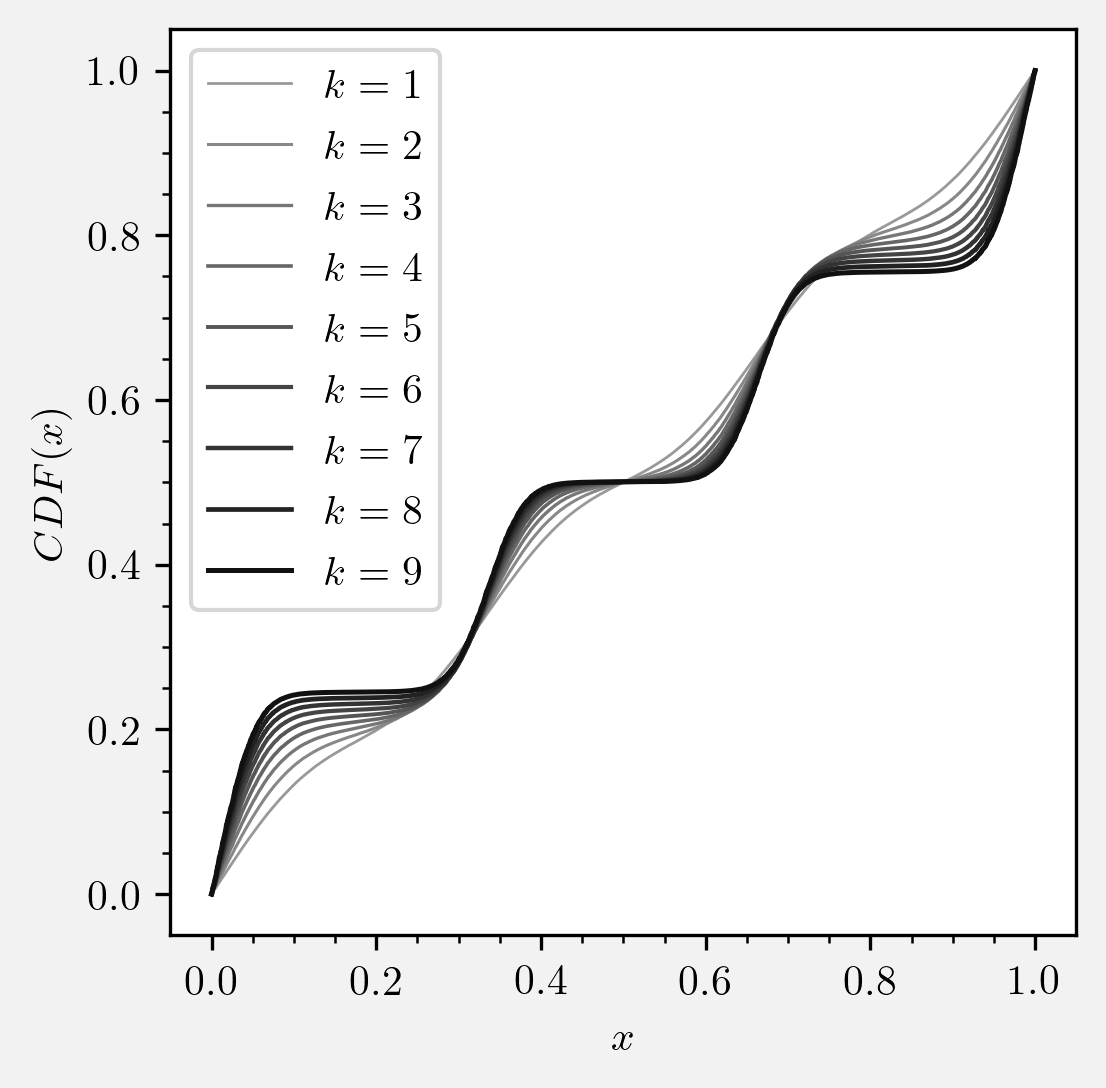

In [6]:
#plot2Dscatter(*ecdf(test).T)
#plot2Dline(ecdf._interpolations[0](test[:,0]).T, test[:,0].T)

iidx = np.argsort(test[:,0])
# plot2Dline(ecdf(test)[:,0][iidx], test[:,0][iidx])


fig = plt.figure(figsize=(4, 4), dpi=300)
ax = fig.add_subplot(111)
plt.gcf().patch.set_facecolor('0.95')
demo_lim=True
if demo_lim:
    plt.gca().set_aspect('equal')
    plt.ylim((-0.05, 1.05))
    plt.xlim((-0.05, 1.05))
# plt.grid(which='major', linewidth=0.5)
plt.minorticks_on()
# plt.grid(which='minor', linewidth=0.1)
# plt.axis('off')
ax.set_ylabel('$CDF(x)$')
ax.set_xlabel('$x$')

# init_ = np.array([])

def col(n):
    d = 1.0/n * 0.6
    c = 0.6 + d
    while True:
        c-=d
        yield str(c)
        
def lw(n):
    d = 1.0/n * 0.6
    c = 0.6
    while True:
        c+=d
        yield str(c)
    
gcol = col(9)
glw = lw(9)

plt.plot(ecdf1(test)[:,0][iidx],  test[:,0][iidx], color=next(gcol), linewidth=next(glw), label='$k=1$')
plt.plot(ecdf2(test)[:,0][iidx],  test[:,0][iidx], color=next(gcol), linewidth=next(glw), label='$k=2$')
plt.plot(ecdf3(test)[:,0][iidx],  test[:,0][iidx], color=next(gcol), linewidth=next(glw), label='$k=3$')
plt.plot(ecdf4(test)[:,0][iidx],  test[:,0][iidx], color=next(gcol), linewidth=next(glw), label='$k=4$')
plt.plot(ecdf5(test)[:,0][iidx],  test[:,0][iidx], color=next(gcol), linewidth=next(glw), label='$k=5$')
plt.plot(ecdf6(test)[:,0][iidx],  test[:,0][iidx], color=next(gcol), linewidth=next(glw), label='$k=6$')
plt.plot(ecdf7(test)[:,0][iidx],  test[:,0][iidx], color=next(gcol), linewidth=next(glw), label='$k=7$')
plt.plot(ecdf8(test)[:,0][iidx],  test[:,0][iidx], color=next(gcol), linewidth=next(glw), label='$k=8$')
plt.plot(ecdf9(test)[:,0][iidx],  test[:,0][iidx], color=next(gcol), linewidth=next(glw), label='$k=9$')
# plt.plot(ecdf10(test)[:,0][iidx], test[:,0][iidx], color=next(gcol), linewidth=next(glw), label='k=10')
# plt.plot(ecdf11(test)[:,0][iidx], test[:,0][iidx], color=next(gcol), linewidth=next(glw), label='k=11')



# if name is not None:
#     plt.savefig(name)
plt.legend()
plt.savefig('mmgpy/_plots/non_uniform_ecdf.pdf')
plt.show()


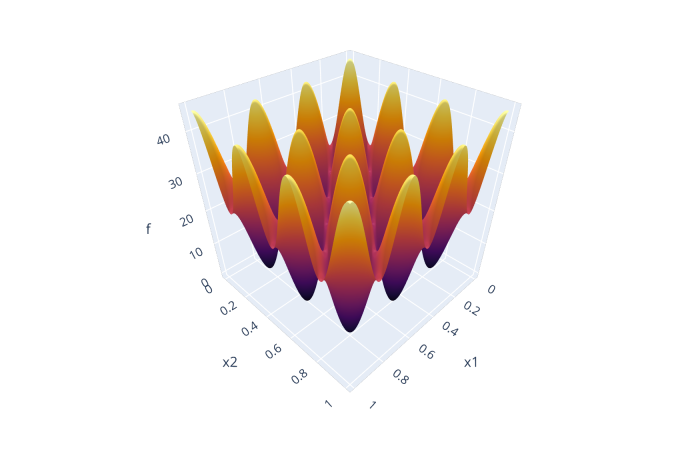

In [31]:
from mmgpy.plotting import plot_3d_surface
from mmgpy.sampling import uniform_grid

x = uniform_grid(2, 200, flatten=False)

# .shape

plot_3d_surface(*x, func(*x), show=True, save="mmgpy/_plots/small_rastrigin.pdf", renderer='svg',
               layout_update=dict(autosize=False, width=500, height=500,
                                  margin=dict(l=20, r=20, t=50, b=30)), 
                showscale=False)

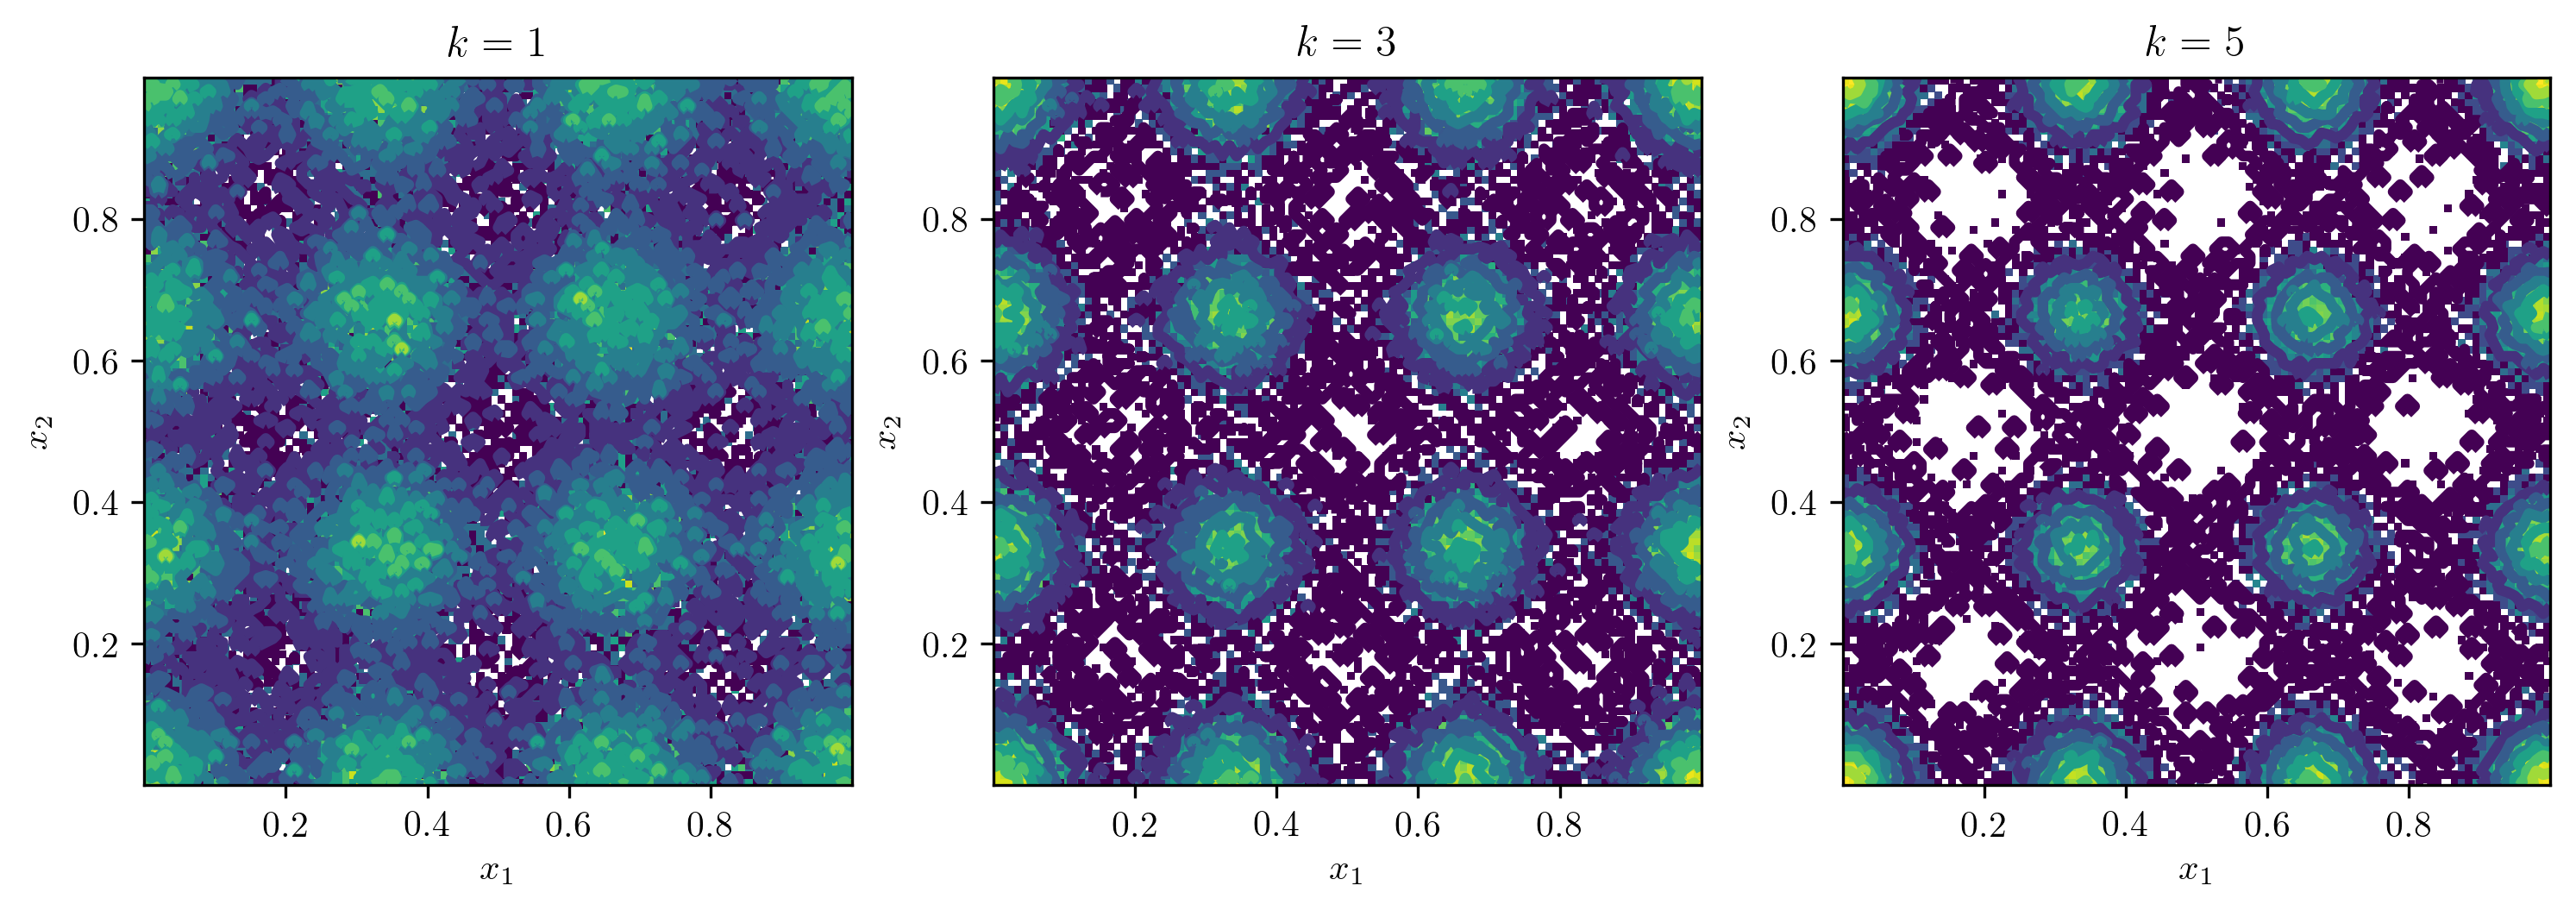

In [39]:
# # plot2Dscatter(*ecdf1(test).T)
# plt.hist2d(, bins=50)
# plt.show()

from matplotlib.colors import LogNorm
# from matplotlib.pyplot import *

fig, ax = subplots(1, 3, figsize=(4*3, 4), dpi=300)

for idx, a in enumerate(ax):
    a.set_ylabel('$x_2$')
    a.set_xlabel('$x_1$')
    a.set_aspect('equal')
    a.set_title(f'$k={idx*2+1}$')
# plt.gca().set_aspect('equal')

for idx, e in enumerate([ecdf1, ecdf3, ecdf5]):
    counts,ybins,xbins,image = ax[idx].hist2d(*e(test).T,bins=100,norm=LogNorm())
    ax[idx].contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=3)

plt.savefig('mmgpy/_plots/ecdf_k_values.pdf', bbox_inches='tight')
plt.show()
    

In [22]:
import matplotlib.pyplot as plt

x = halton([[0] * 2, [1] * 2], 100)
p = 100 - 100 * np.sqrt(
    (x.T[0] - 0.5) ** 2 + (x.T[1] - 0.5) ** 2).flatten()
tests = InterpolatedMarginalInverseECDF(p ** 4, x,
                                       kind='linear')

# print(x)
# print(test(x))
# print(test(x))
plt.scatter(*test(x).T)

plt.plot(np.linspace(0, 1, 100),
         tests._interpolations[0](np.linspace(0.0, 1.0, 100)))

# plt.scatter(*x.T)
plt.show()


TypeError: 'numpy.ndarray' object is not callable

## Inverse mapping method

In [4]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

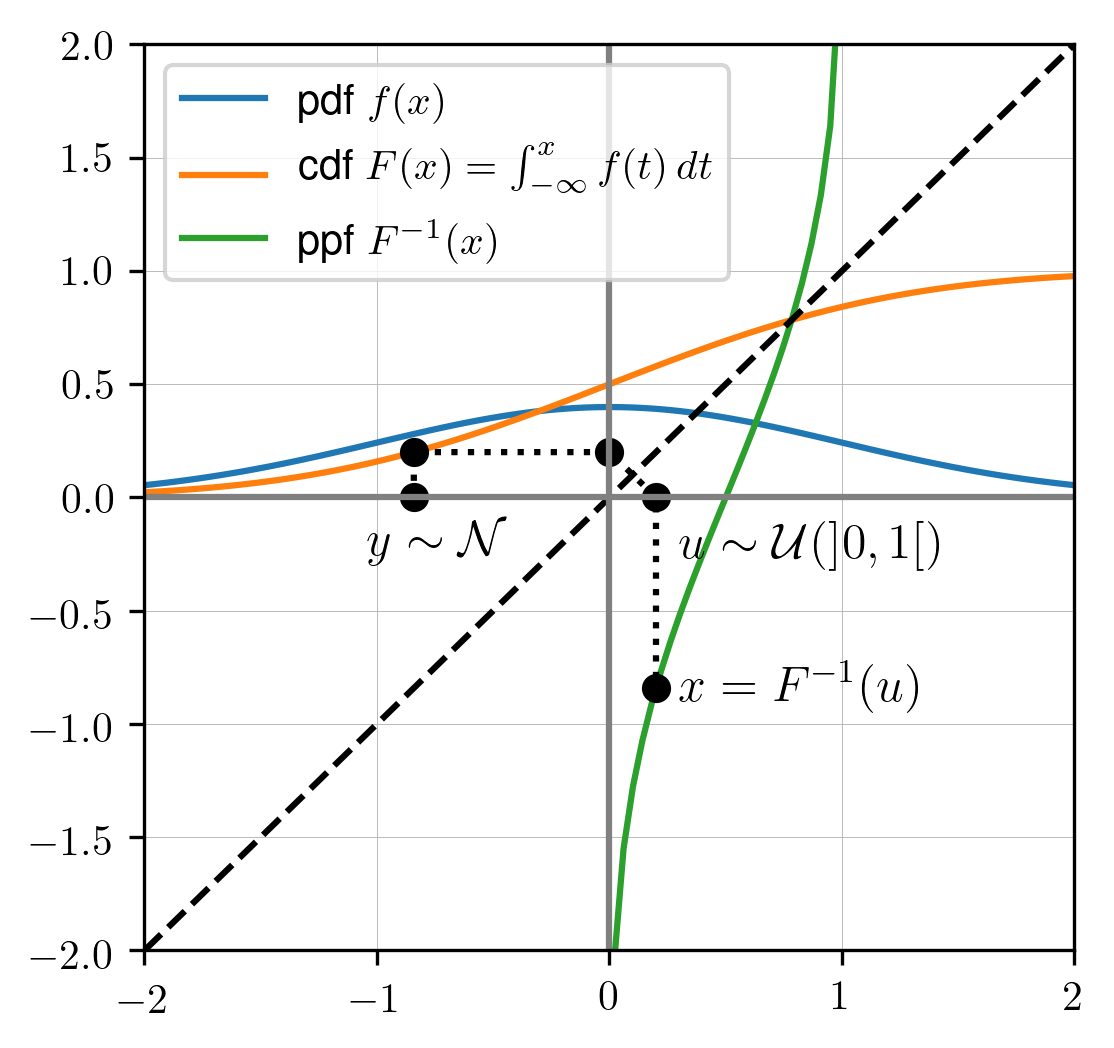

In [79]:
from scipy.stats import norm as n

f1 = plt.figure(figsize=(4,4), dpi=300) 
x = np.linspace(-2, 2, 100)

# plt.title(u"Inverse transforming sampling for normal distribution") 
plt.plot(x, n.pdf(x), label=r'pdf $f(x)$') # proba density function 
plt.plot(x, n.cdf(x), label=r'cdf $F(x) = \int_{-\infty}^x f(t) \, dt$') # cumulative distributive function 
plt.plot(x, n.ppf(x), label='ppf $F^{-1}(x)$') # percent point function 
plt.plot(x,x,'--k') 
plt.plot([n.ppf(0.2),n.ppf(0.2),0,0.2,0.2],[0,0.2,0.2,0,n.ppf(0.2)],'o:k') 
plt.text(n.ppf(0.2)-0.2, -1.3*0.2, r"$y \sim \cal N$", size=12) 
#plt.text(0.2, 0.07, r'$x $', size=14)
plt.text(0.3, -3.0*0.09, r'$u \sim \mathcal{U}(]0,1[)$', size=12)
plt.text(0.3, -10*0.09, r'$x = F^{-1}(u)$', size=12)
plt.ylim(-2,2)
plt.xlim(-2,2)

plt.axhline(color = 'gray') 
plt.axvline(color = 'gray') 
plt.rcParams['legend.loc'] = 'upper left' 
plt.grid(which='major',linewidth=0.2)
plt.grid(which='minor',linewidth=0.1)
plt.legend()
plt.savefig('mmgpy/_plots/inverse_mapping.pdf', bbox_inches='tight')
